# Explore here

1. DESCARGA DEL FICHERO

In [2]:

url="https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
respuesta=requests.get(url)

with open('AB_NYC_2019.csv','wb') as archivo:
    archivo.write(respuesta.content)

#Para mover el archivo, poner en la terminal:
    # mv /workspaces/Isa-machine-learning-template/src/AB_NYC_2019.csv /workspaces/Isa-machine-learning-template/data/raw/AB_NYC_2019.csv

2. REALIZAMOS UN EDA 

    2.1 Exploración y limpieza de datos

    2.2 Análisis univariante
    
    2.3 Análisis multivariante


In [3]:
data= pd.read_csv('/workspaces/Isa-machine-learning-template/data/raw/AB_NYC_2019.csv')

2.1 EXPLORACIÓN Y LIMPIEZA DE DATOS

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Tenemos 48895 con 16 columnas, de las cuales:
    
    * 5 categóricas: De las cuales: posibles para agrupar para análisis: 
        * neighbourhood_group
        * neighbourhood
        * room_type    
    * 1 fecha categórica tipo object (con NaN)  
    * 1 identificador único tipo int  
    * 1 identificador no único tipo int (se puede considerar como categórica)
    * 2 de posición (lat y long) tipo float  
    * 6 numéricas
          

* Hay nulos en las variables last_review y reviews_per_month, tiene pinta que asociadas a number_of_reviews=0 (validar)
* Existen NaN en name y host_name también


**Eliminamos duplicados:**

In [5]:
print(f"El número de duplicados es: {data.drop(['id'], axis = 1).duplicated().sum()}")

# No hay duplicados, hemos eliminado las columnas identificadoras.
print(f"El % de nulos es:\n {data.isnull().sum()/len(data)*100}")


El número de duplicados es: 0
El % de nulos es:
 id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [9]:
#Comprobamos que la variable host_id no es única
print(data["host_id"].groupby(data["host_id"]).count().sort_values(ascending=False))

#Comprobamos que los nulos de last_review vienen por 0 reviews:
data["number_of_reviews"][data["last_review"].isnull()].sum()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
13540183       1
13538150       1
13535952       1
13533446       1
274321313      1
Name: host_id, Length: 37457, dtype: int64


0

En este caso, las variables con un número significativo de nulos son **last_review** y **reviews_per_month**, cuyos nulos tiene pinta de que coinciden ya que son el mismo número.  
Dependiendo de cómo queramos hacer el análisis, los trataremos, ya que podría ser un valor importante a tener en cuenta, por ejemplo si quiero ver la importancia del número de valoraciones con el precio o el tipo de habitación o el barrio.  
Hay que analizar también si todas las nulas vienen de number_of_reviews 0, lo vemos en el código anterior, efectivamente vienen de los valores que no tienen reviews. Aquí nos faltaría ver por qué no tienen reviews, si es por poco tiempo, por precio etc. Puede ser una buena variable a predecir.  
En este caso, **rellenamos con 0 los nulos**.

In [15]:
#Vamos a rellenar la variable reviews_per_month y last_review
data["reviews_per_month"].fillna(0, inplace = True)
data["last_review"].fillna("0", inplace = True)
data[["reviews_per_month","last_review"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews_per_month  48895 non-null  float64
 1   last_review        48895 non-null  object 
dtypes: float64(1), object(1)
memory usage: 764.1+ KB


**Eliminamos información irrelevante:**  

Vamos a eliminar: **id**, **name**, **host_name**, **latitude** y **longitude** (estas dos últimas podrían tener algún tipo de importancia según la temperatura por ejemplo de la zona por estar más al norte o sur etc, pero tenemos las variables neighbourhood_group y neighbourhood que nos van a indicar si tiene algo que ver la situación del inmueble)
La variable calculated_host_listing_count nos indica el número de inmubles por host, por tanto, mantenemos host_id ya que puede ser relevante.


In [16]:
data.drop(["id","name","host_name","latitude","longitude"],axis=1,inplace=True)
print(data.head())
data.info()

KeyError: "['id', 'name', 'host_name', 'latitude', 'longitude'] not found in axis"

**ANÁLISIS UNIVARIANTE**

**Variables categóricas**

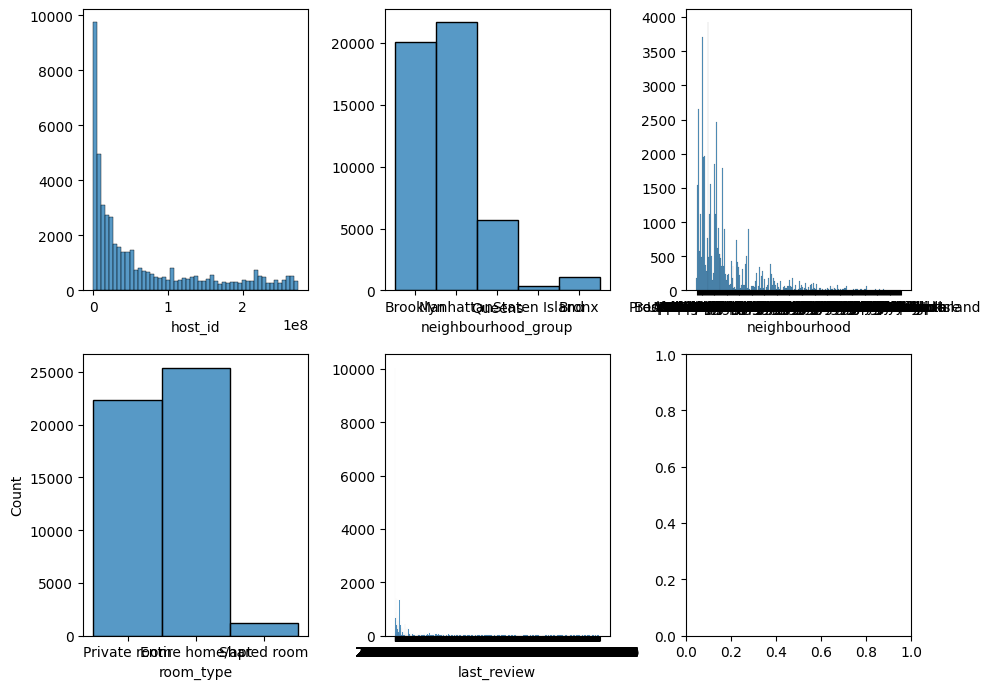

In [17]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = data, x = "host_id").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "room_type")
sns.histplot(ax = axis[1, 1], data = data, x = "last_review").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Con esta pequeña representación podemos tener claros próximos pasos:
* **host_id:** Hay un valor que se repite mucho más que el resto, comprobar si es el valor 0 o un host en concreto. Esta variable, de por sí puede tener más sentido si añadimos una variable que sea número de viviendas, a partir de esta variable.
* **neighbourhood_group:** Manhattan es el barrio que más airbnb tiene seguido de Brooklyn, el resto tienen 1/4 o menos de estos barrios.
* **neighbourhood:** Demasiados valores, descartamos esta variable y dejamos la agrupada en group.
* **room_type:** El predominante es casas enteras, seguido de habitación privada, y por último con muchísimos menos valores habitación compartida.
* **last_review:** Demasiados valores, podría estar interesante separar por el mes y el año de la review y (buscando un punto de referencia, tal vez la fecha del archivo) añadir una variable del tiempo que hace desde la última review (ya analizaríamos en qué unidad, si meses o días dependiendo de los datos)

**Variables numéricas** 

+ price
+ minimum_nights
+ number_of_reviews
+ reviews_per_month
+ calculated_host_listings_count
+ availability_365 

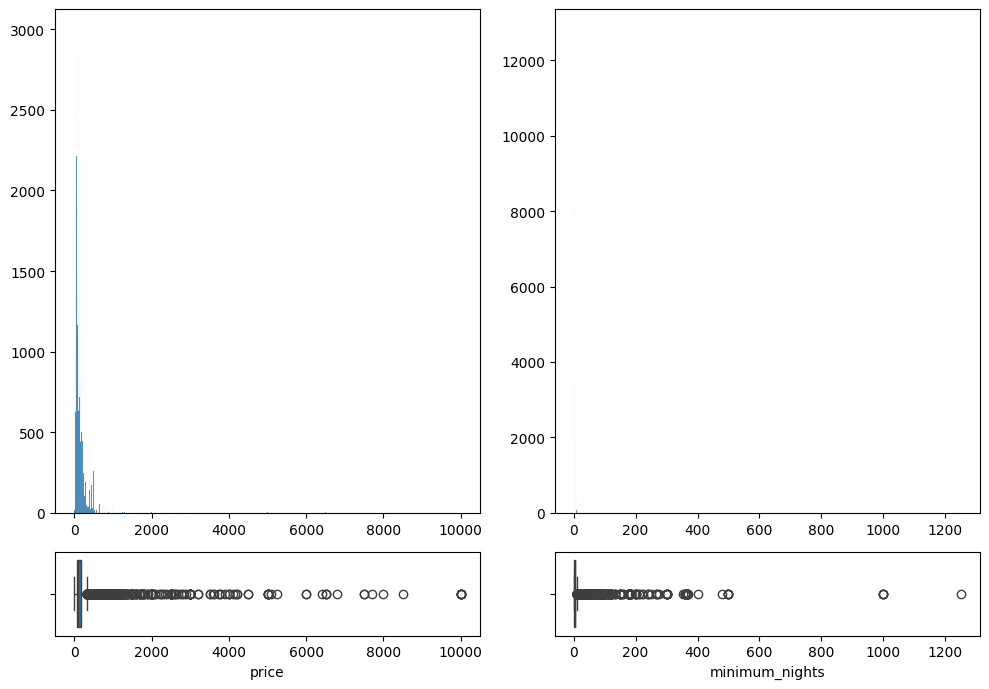

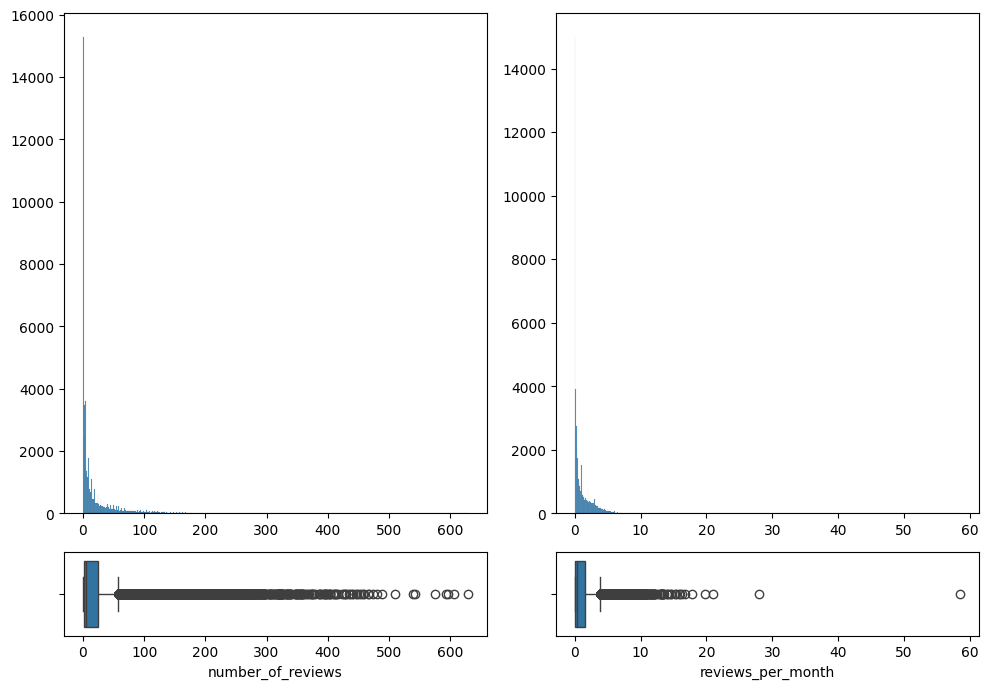

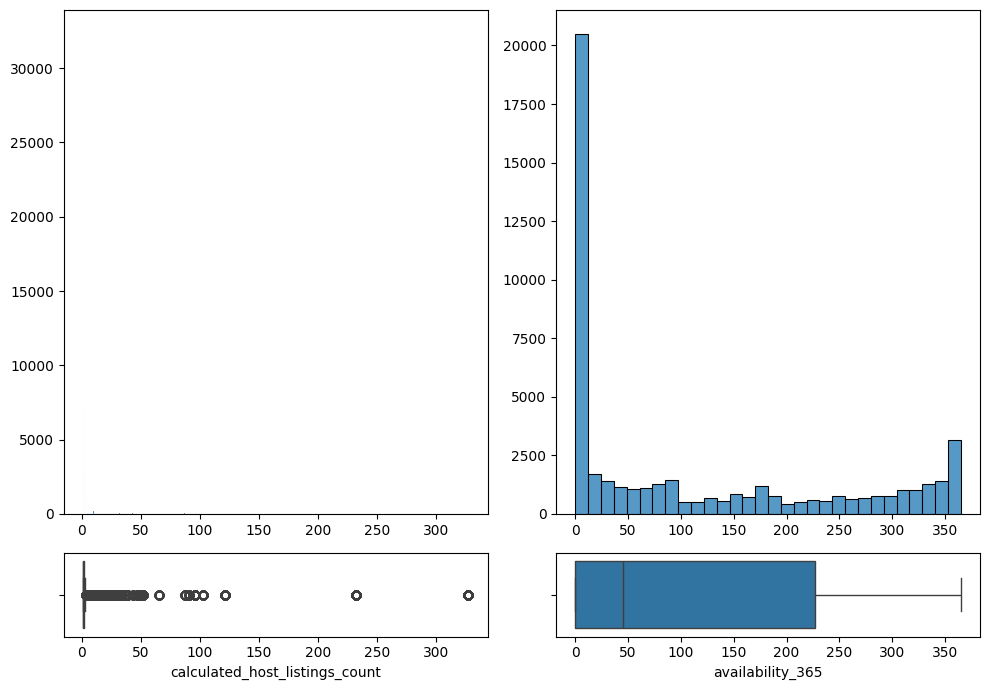

In [18]:

# Crear una figura múltiple con histogramas y diagramas de caja
#Lo vamos a mostrar de dos en dos para verlo mejor

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0, 0], data = data, x = "price")
axis[0, 0].set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights")
axis[0, 1].set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")
plt.tight_layout()
plt.show()

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0, 0], data = data, x = "number_of_reviews")
axis[0, 0].set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1, 0], data = data, x = "number_of_reviews")
sns.histplot(ax = axis[0, 1], data = data, x = "reviews_per_month")
axis[0, 1].set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1, 1], data = data, x = "reviews_per_month")
plt.tight_layout()
plt.show()

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0, 0], data = data, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "calculated_host_listings_count")
sns.histplot(ax = axis[0, 1], data = data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "availability_365")
plt.tight_layout()
plt.show()



Nos hacemos una idea de los outliers y cómo se distribuyen las variables, más adelante vamos a ir variable a variable analizándolas.

**ANÁLISIS MULTIVARIANTE**

**Numérico-numérico**
+ price
+ minimum_nights
+ number_of_reviews
+ reviews_per_month
+ calculated_host_listings_count
+ availability_365 

En este caso, como son muchas variables, vamos a ver primero las correlaciones en un mapa de calor

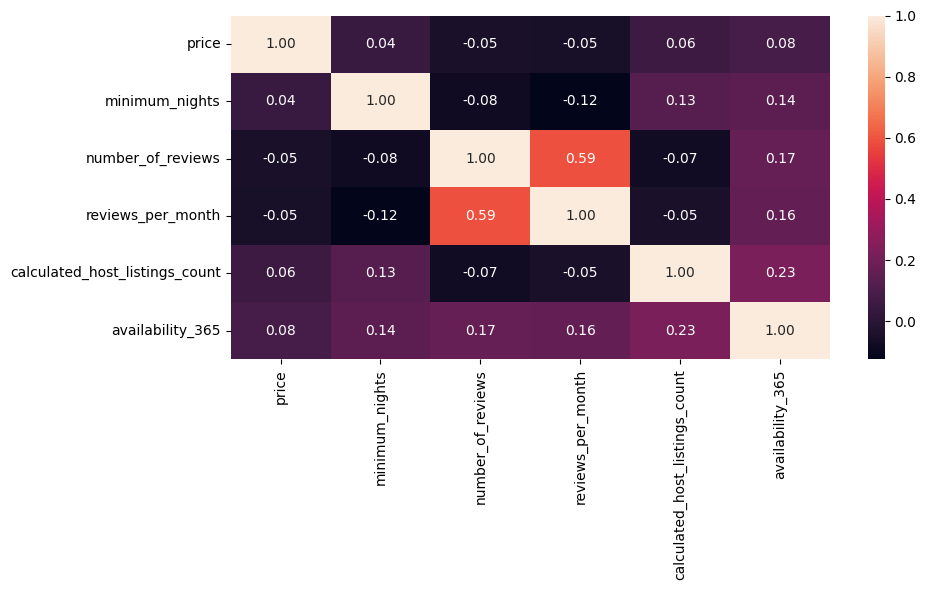

In [19]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

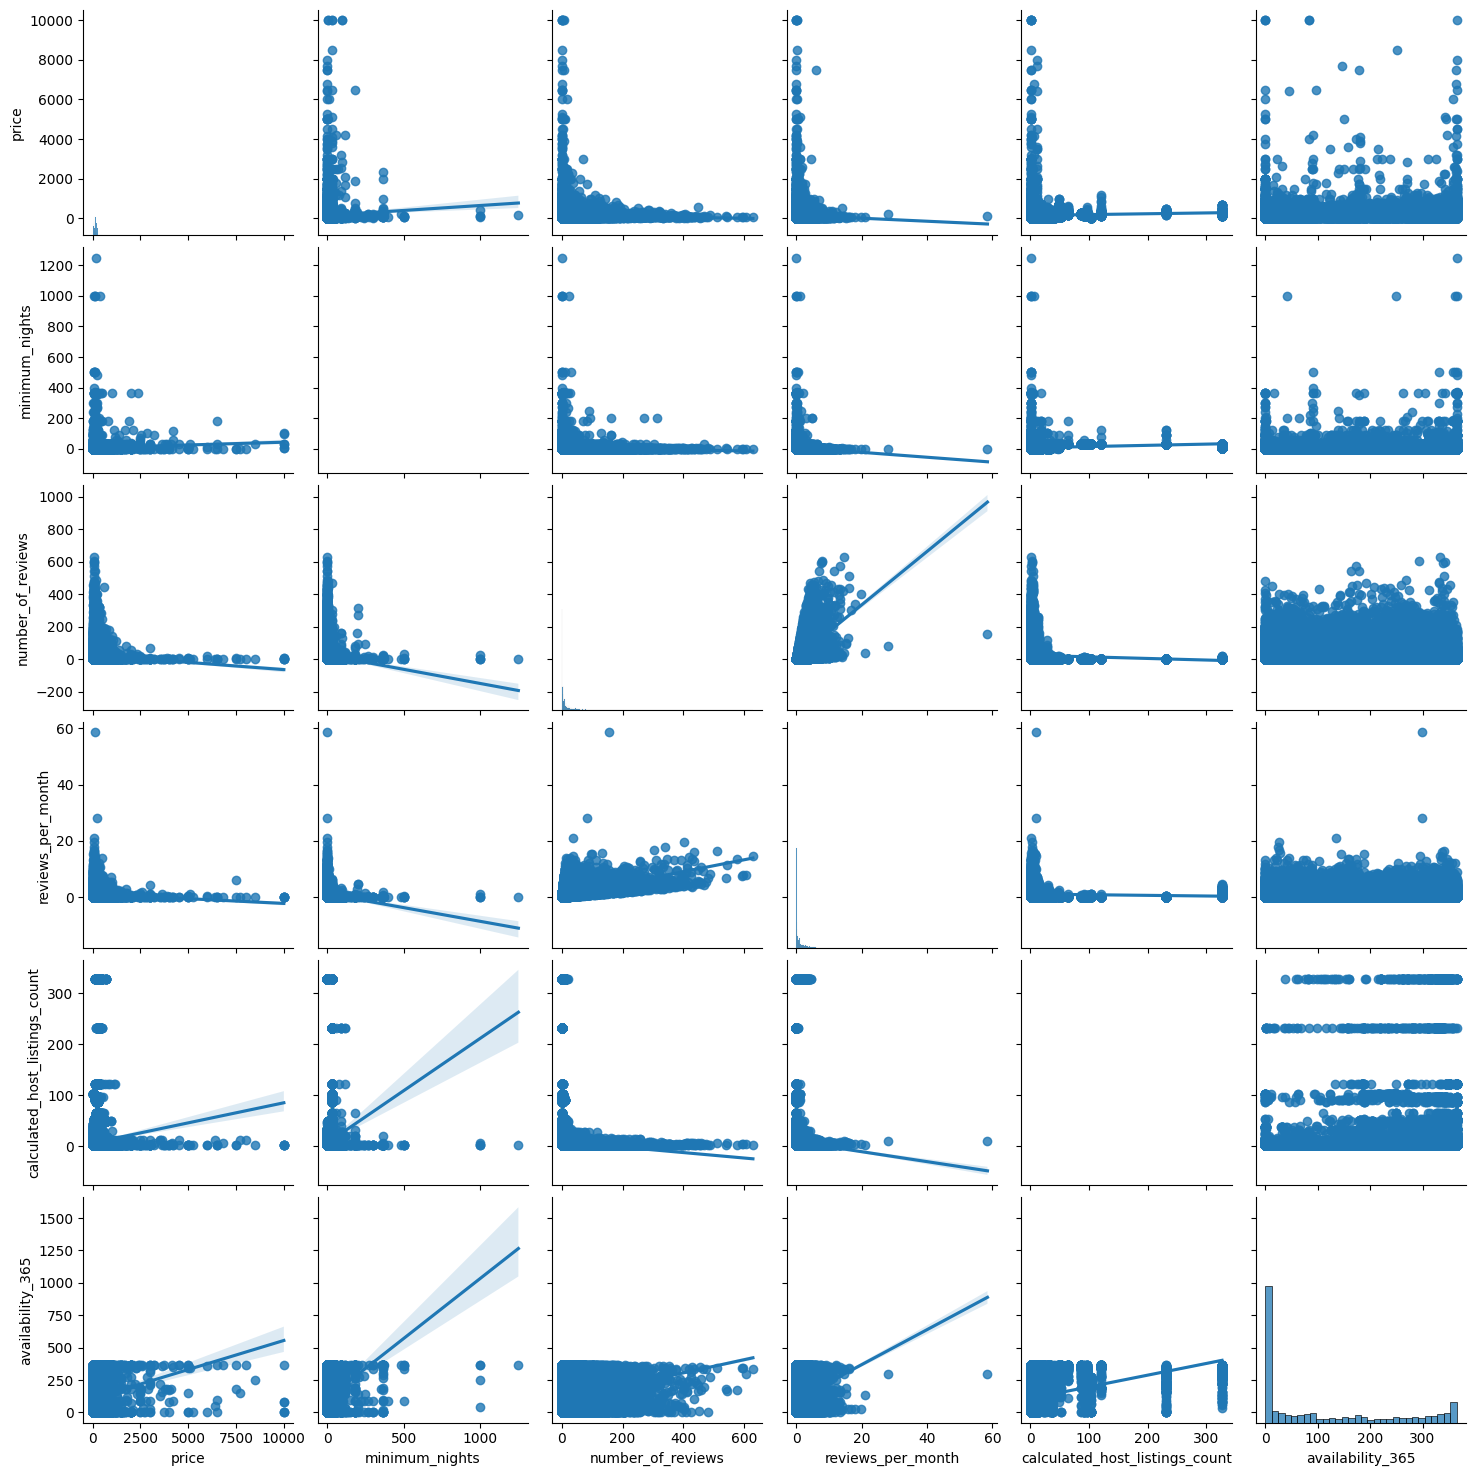

In [20]:
data1=data.drop("host_id",axis=1,inplace=False)
sns.pairplot(data1, kind='reg', diag_kind='hist', markers='o')

**Con estos gráficos y el mapa de calor podemos ir analizando qué variables tienen buena correlación para el estudio**

No existe una correlación demasiado alta entre ningunas variables, a excepción de reviews_per_months y number_of_reviews (pero son dependientes, por tanto no nos interesa su correlación).

Sin embargo, podríamos empezar fijándonos en las variables con la correlación más alta:
* *calculated_host_listings_count* vs *minimum_nights*
* *availability_365* vs *minimum_nights*, *number_of_reviews* (y por tanto reviews_per_month) y *calculated_host_listings_count*

**availability_365** tiene pinta de ser una variable con un alto impacto en cualquier estudio que hagamos

**Categórico-categórico**
* neighbourhood_group
* room_type

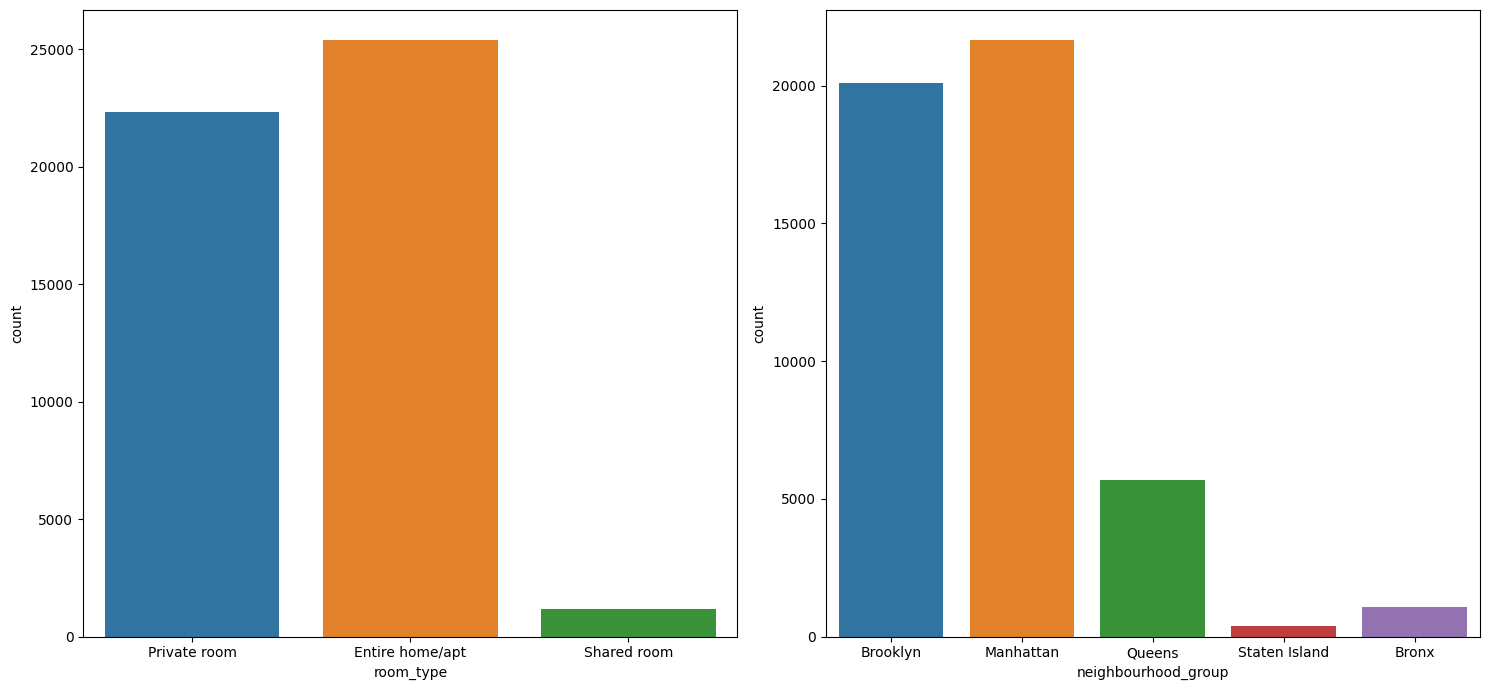

<Axes: xlabel='neighbourhood_group', ylabel='count'>

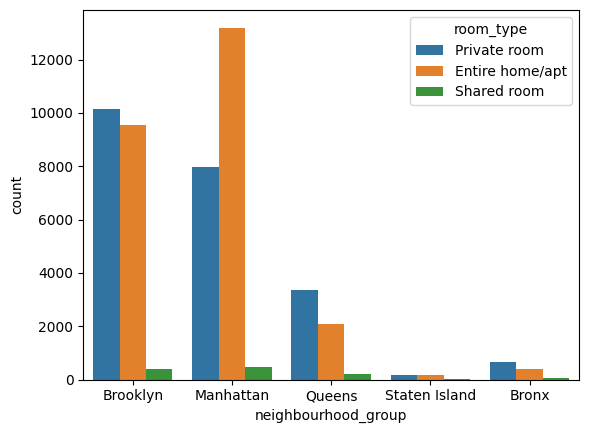

In [21]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))

sns.countplot(ax=axis[1], data = data, x = "neighbourhood_group", hue = "neighbourhood_group")
sns.countplot(ax=axis[0], data = data, x = "room_type", hue="room_type")

plt.tight_layout()
plt.show()

sns.countplot( data = data, x = "neighbourhood_group", hue = "room_type")

* De la base de datos, el tipo de alquiler que menos se repite (casi no hay) es el *shared room*, mientras que **entire home** es el que más se repite.

* Si tenemos en cuenta los barrios: los barrios donde hay más inmuebles en airbnb son **Manhattan y Brooklyn** seguidos de Queens con 1/4 parte de estos, y por último *Bronx* y *Staten Island* casi residual.

* Viendo la correlación entre ellas, podemos observar alguna información interesante
    * En **Manhattan** el número de ***entire home*** es **mucho mayor** que el de ***private room***.
    * En **Brooklyn, Queens y Bronx** vemos que el ***private room*** es **superior** al ***entire home***

**Categórico-numérico**

**Hay que transformar las variables categóricas en numéricas para esto**

* neighbourhood_group -> neighbourhood_group_n
* room_type -> room_type_n

In [24]:

le = LabelEncoder()
data['neighbourhood_group_n'] = le.fit_transform(data['neighbourhood_group'])
categorias_neighbourhood = le.classes_
codigos_neighbourhood = le.transform(categorias_neighbourhood)
data['room_type_n'] = le.fit_transform(data['room_type'])
categorias_room = le.classes_
codigos_room = le.transform(categorias_room)
print(categorias_neighbourhood,codigos_neighbourhood)
print(categorias_room,codigos_room)

data_n=data.drop(['neighbourhood_group','neighbourhood','last_review','room_type'],axis=1,inplace=False)


['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island'] [0 1 2 3 4]
['Entire home/apt' 'Private room' 'Shared room'] [0 1 2]


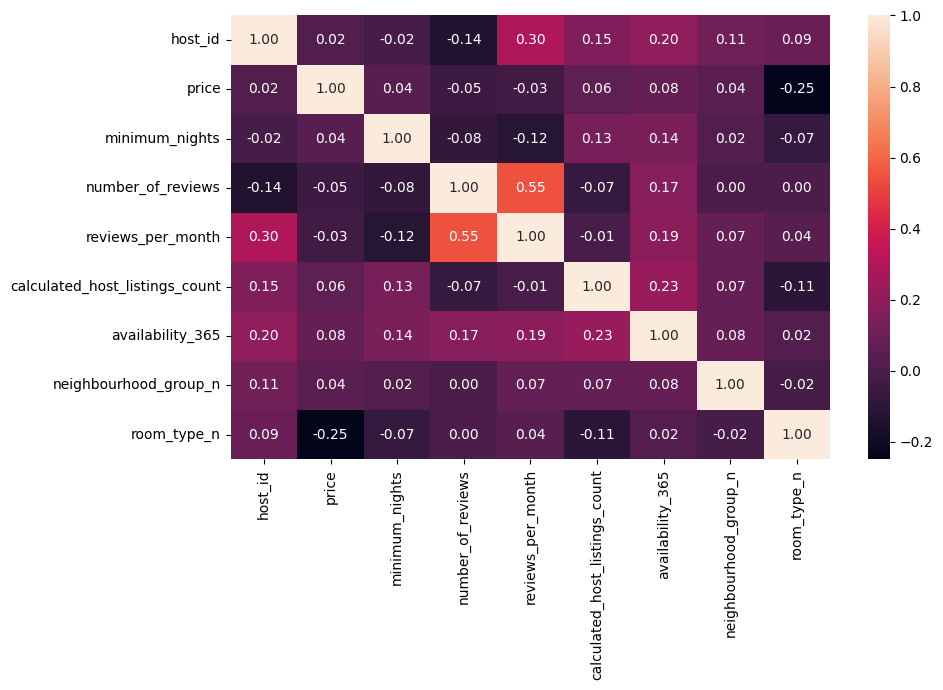

In [15]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data_n.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Como extra a lo ya comentado anteriormente, podemos ver una pequeña correlación entre neighbourhood_group y host_id, que no es relevante ya que no sabemos cómo está calculado el host_id, y estará directamente relacionada con el número de inmuebles por barrio.

Lo que sí es interesante es la relación (inversa) entre el precio y el tipo de habitacion (tiene sentido, ya que la habitación compartida corresponde con la categoría de mayor valor en la factorización)

**INGENIERÍA DE CARACTERÍSTICAS**

**Análisis de outliers**

In [25]:
data.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,1.675345,0.504060
std,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.735816,0.545379
min,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,2.000000,0.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2.000000,1.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.000000


Ya podemos ver que **minimum nights**, **price**, **calculated_host_listings_count** y **number of reviews** tienen **outliers**. 

Vamos a realizar un análisis variabl a variable, observando gráficos de cajas, histograma y descripción estadística.

No incluimos en los gráficos ni host_id ya que son identificadores, ni las categóricas transformadas a numéricas, ya que los valores transformados son todos los que hay, no tiene sentido este tipo de gráfico.

Vamos con el análisis y transformación de **PRICE**

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


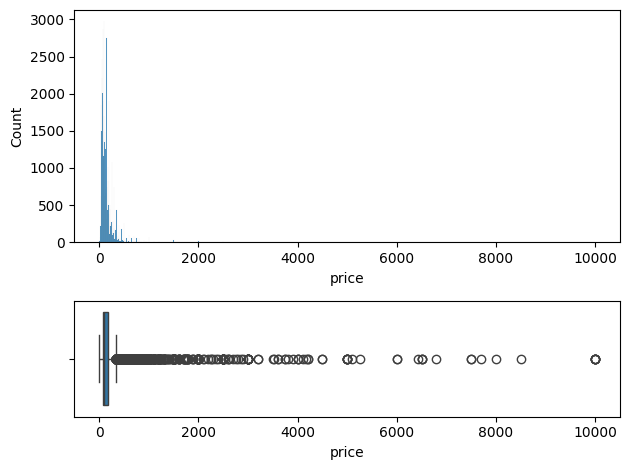

In [26]:
fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]})

print(data_n["price"].describe())
sns.boxplot(ax = axis[1], data = data_n, x = "price")
sns.histplot(ax = axis[0], data = data_n, x = "price")
plt.tight_layout()
plt.show()


In [27]:

print(data.groupby("price")["price"].count().sort_values(ascending=False).head(20))

price_stats=data["price"].describe()
price_iqr = price_stats["75%"] - price_stats["25%"]
up_lim_price = price_stats["75%"] + 1.5 * price_iqr
lo_lim_price = price_stats["25%"] - 1.5 * price_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(up_lim_price, 2)} y {round(lo_lim_price, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

price
100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
125    1057
90     1021
250    1018
55      950
45      891
85      877
40      771
175     763
99      742
110     739
Name: price, dtype: int64
Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64 count    48895.000000
mean       121.960996
std         66.508391
min          0.000000
25%         69.000000
50%        106.000000
75%        152.720687
max        334.000000
Name: price_adj, dtype: float64


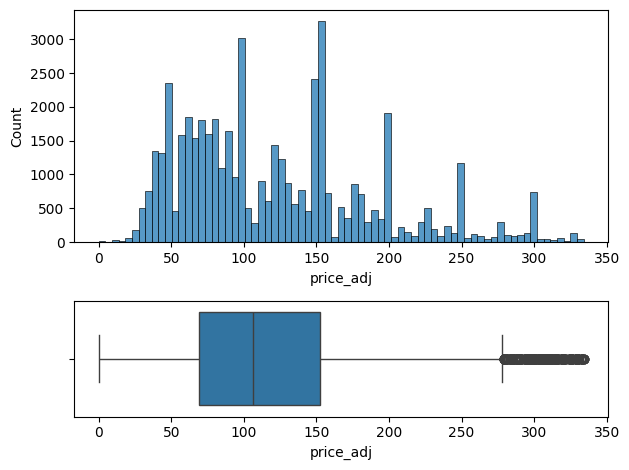

price_adj
152.720687    2972
100.000000    2051
150.000000    2047
50.000000     1534
60.000000     1458
200.000000    1401
75.000000     1370
80.000000     1272
65.000000     1190
70.000000     1170
120.000000    1130
125.000000    1057
90.000000     1021
250.000000    1018
55.000000      950
45.000000      891
85.000000      877
40.000000      771
175.000000     763
99.000000      742
Name: price_adj, dtype: int64


In [28]:
data["price_adj"]=np.where(data["price"]>up_lim_price,data["price"].mean(),data["price"])
print(data["price"].describe(),data["price_adj"].describe())

fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})


sns.boxplot(ax = axis[1], data = data, x = "price_adj")
sns.histplot(ax = axis[0], data = data, x = "price_adj")

plt.tight_layout()
plt.show()

print(data.groupby("price_adj")["price_adj"].count().sort_values(ascending=False).head(20))

Nos hemos llevadoel valor más repetido a la media. En este caso hay mucha cantidad de outliers, podriamos valorar agrupar los valores, o bien poner el limite superior en 90% de datos:


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64 count    48895.000000
mean       137.691044
std        103.295394
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        799.000000
Name: price_adj90, dtype: float64


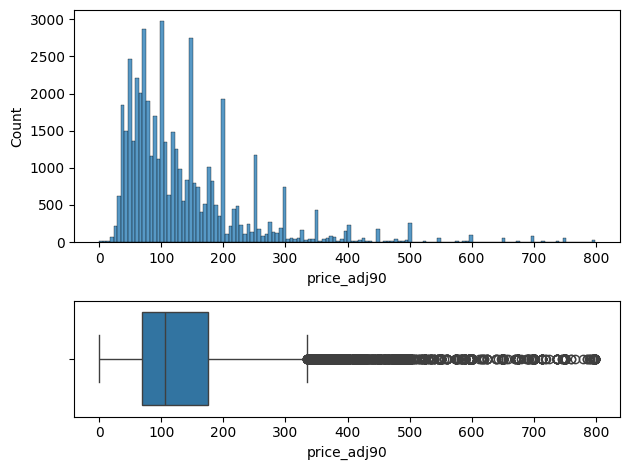

price_adj90
100.0    2051
150.0    2047
50.0     1534
60.0     1458
200.0    1401
75.0     1370
80.0     1272
65.0     1190
70.0     1170
120.0    1130
125.0    1057
90.0     1021
250.0    1018
55.0      950
45.0      891
85.0      877
40.0      771
175.0     763
99.0      742
110.0     739
Name: price_adj90, dtype: int64


In [29]:
data["price_adj90"]=np.where(data["price"]>np.percentile(data["price"], 99),data["price"].mean(),data["price"])
print(data["price"].describe(),data["price_adj90"].describe())

fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})


sns.boxplot(ax = axis[1], data = data, x = "price_adj90")
sns.histplot(ax = axis[0], data = data, x = "price_adj90")

plt.tight_layout()
plt.show()

print(data.groupby("price_adj90")["price_adj90"].count().sort_values(ascending=False).head(20))

Esta varible podría ser una variable objetivo, o bien normalizarla (lo hacemos más adelante cuando normalicemos el resto)

Vamos con el análisis y transformación de **MINIMUM_NIGHTS**

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


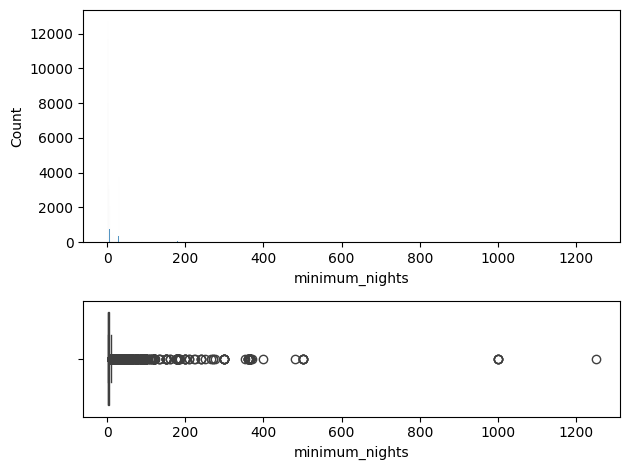

109
minimum_nights
1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
29      340
15      279
20      223
28      203
31      201
21      135
8       130
60      106
90      104
12       91
Name: minimum_nights, dtype: int64


In [30]:
fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

print(data_n["minimum_nights"].describe())
sns.boxplot(ax = axis[1], data = data_n, x = "minimum_nights")
sns.histplot(ax = axis[0], data = data_n, x = "minimum_nights")
#axis[0].set_ylim(0, 3000)
plt.tight_layout()
plt.show()

print(len(data.groupby("minimum_nights")["minimum_nights"].nunique()))
print(data.groupby("minimum_nights")["minimum_nights"].count().sort_values(ascending=False).head(20))


En el caso de **minimum_nights**, casi todos los valores se agrupan entre el 1 y el 5, debemos eliminar o agrupar los datos atípicos. Para no desvirtuar el resto de variables podemos llevarlos a la media y ver si cambia mucho la información estadística.


In [55]:
min_nights_stats=data["minimum_nights"].describe()
min_nights_iqr = min_nights_stats["75%"] - min_nights_stats["25%"]
up_lim_min_nights = min_nights_stats["75%"] + 1.5 * min_nights_iqr
lo_lim_min_nights = min_nights_stats["25%"] - 1.5 * min_nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(up_lim_min_nights, 2)} y {round(lo_lim_min_nights, 2)}, con un rango intercuartílico de {round(min_nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango intercuartílico de 4.0


Llevamos los valores fuera del rango intercuartílico a la media:

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64 count    48895.000000
mean         3.288863
std          2.274032
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         11.000000
Name: minimum_nights_adj, dtype: float64


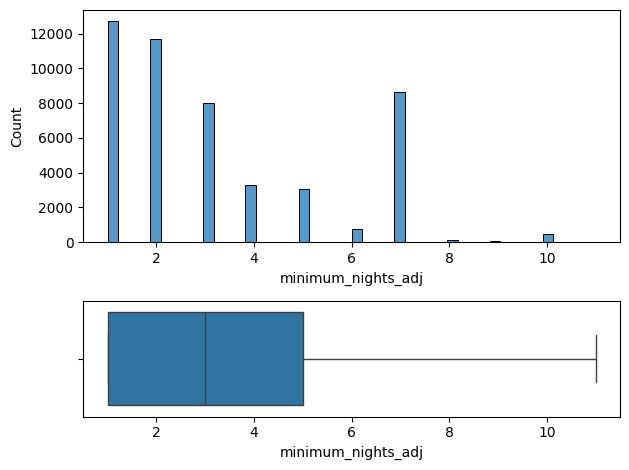

In [63]:

data["minimum_nights_adj"] = np.where(data["minimum_nights"] > up_lim_min_nights,
    data["minimum_nights"].mean(),
    data["minimum_nights"]
)
print(data["minimum_nights"].describe(),data["minimum_nights_adj"].describe())

fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})


sns.boxplot(ax = axis[1], data = data, x = "minimum_nights_adj")
sns.histplot(ax = axis[0], data = data, x = "minimum_nights_adj")

plt.tight_layout()
plt.show()

Sin embargo, viendo que entre los primeros 5 valores más repetidos se encuentra el 30 y que entre los 30 valores más repetidos excepto el 60 y el 90 todos son menores de 31, vamos a hacerlo poniendo como límite sperior el 35

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64 count    48895.000000
mean         5.714114
std          8.327425
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         35.000000
Name: minimum_nights_adj35, dtype: float64


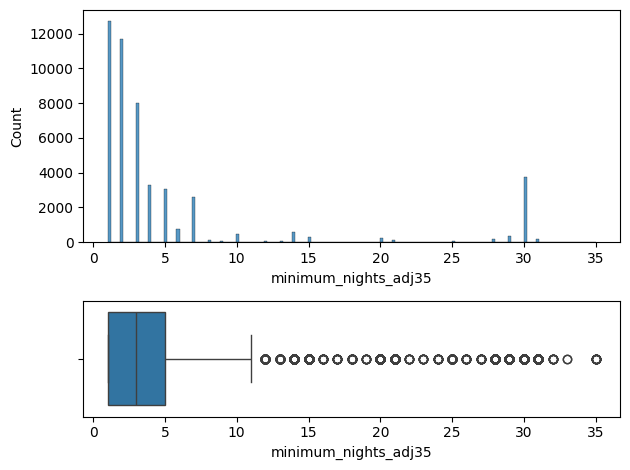

In [31]:
data["minimum_nights_adj35"] = np.where(data["minimum_nights"] > 35,
    data["minimum_nights"].mean(),
    data["minimum_nights"]
)
print(data["minimum_nights"].describe(),data["minimum_nights_adj35"].describe())

fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})


sns.boxplot(ax = axis[1], data = data, x = "minimum_nights_adj35")
sns.histplot(ax = axis[0], data = data, x = "minimum_nights_adj35")

plt.tight_layout()
plt.show()

Con la distribución así, no hemos variado tanto la media, y aunque aparecen valores atipicos, tenemos en cuenta el valor 30, que tiene sentido ya que se repite mucho (mínimo de noches 30 días, 1 mes). Los valores de los percentiles 75, 50 y 25 se mantienen iguales.

Vamos con el análisis y transformación de **NUMBER_OF_REVIEWS**

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


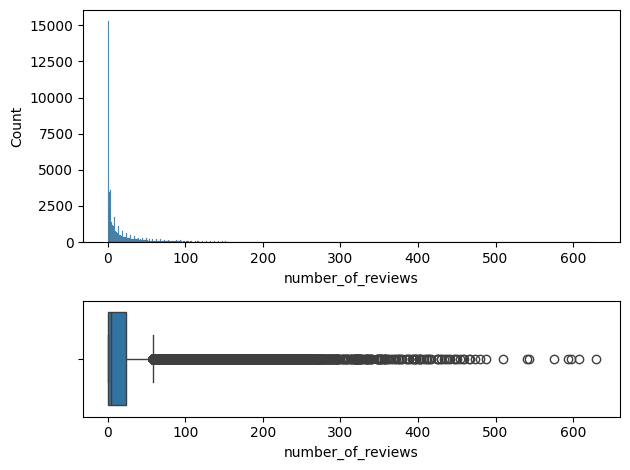

In [32]:
fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

print(data_n["number_of_reviews"].describe())
sns.boxplot(ax = axis[1], data = data_n, x = "number_of_reviews")
sns.histplot(ax = axis[0], data = data_n, x = "number_of_reviews")
plt.tight_layout()
plt.show()



394
number_of_reviews
0     10052
1      5244
2      3465
3      2520
4      1994
5      1618
6      1357
7      1179
8      1127
9       964
10      803
11      778
12      682
13      611
14      575
15      536
16      471
17      461
18      417
19      401
Name: number_of_reviews, dtype: int64
Los límites superior e inferior para la búsqueda de outliers son 58.5 y -33.5, con un rango intercuartílico de 23.0


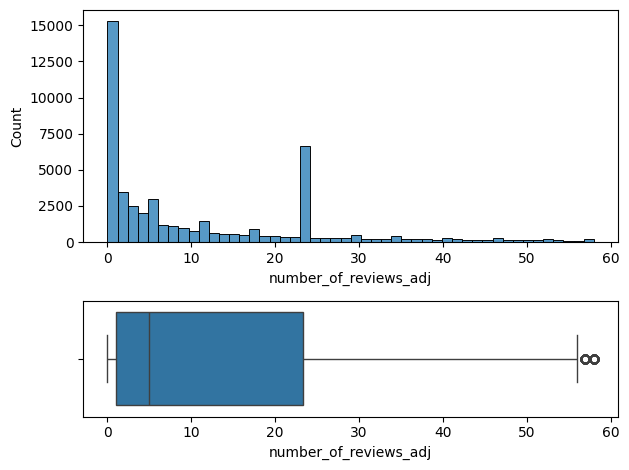

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64 count    48895.000000
mean        11.336467
std         13.287148
min          0.000000
25%          1.000000
50%          5.000000
75%         23.274466
max         58.000000
Name: number_of_reviews_adj, dtype: float64


In [33]:
var_name="number_of_reviews"
var_name_adj="number_of_reviews_adj"
print(len(data.groupby(var_name)[var_name].nunique()))
print(data.groupby(var_name)[var_name].count().sort_values(ascending=False).head(20))

var_stats=data[var_name].describe()
IQR = var_stats["75%"] - var_stats["25%"]
MAX = var_stats["75%"] + 1.5 * IQR
MIN = var_stats["25%"] - 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(MAX, 2)} y {round(MIN, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

data[var_name_adj] = np.where(data[var_name] > MAX,
    data[var_name].mean(),
    data[var_name]
)


fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})


sns.boxplot(ax = axis[1], data = data, x = var_name_adj)
sns.histplot(ax = axis[0], data = data, x = var_name_adj)

plt.tight_layout()
plt.show()

print(data[var_name].describe(),data[var_name_adj].describe())

Con el valor máximo del IQR, nos pasa igual que en la var price, que hay muchos valores atípicos, en este caso, porque ya más de un 25% de los datos se concentra entre 1 y 2 reseñas. Y luego, los valores se distribuyen a lo largo de los datos. Es una variable que, si tuviera relevancia, podríamos normalizarla. Aunque también sería bueno tener más información: la valoración de las reseñas y el tiempo que lleva el inmueble (para ver si los 0s tienen que ver con el tiempo o con el inmueble)

VAMOS A ANALIZAR **REVIEWS_PER_MONTH**

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64


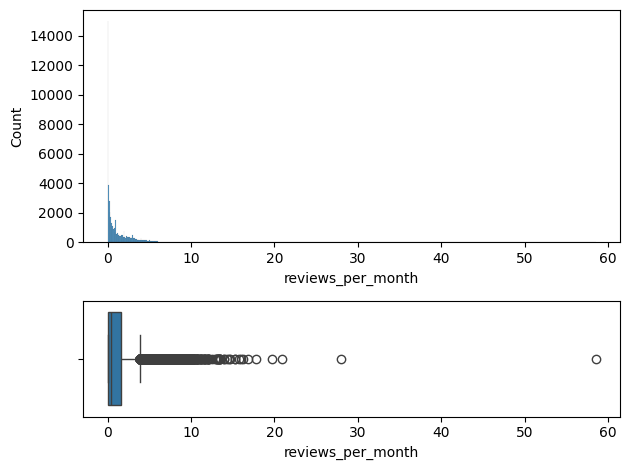

In [34]:
fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

print(data_n["reviews_per_month"].describe())
sns.boxplot(ax = axis[1], data = data_n, x = "reviews_per_month")
sns.histplot(ax = axis[0], data = data_n, x = "reviews_per_month")
plt.tight_layout()
plt.show()



938
reviews_per_month
0.00    10052
0.02      919
0.05      893
1.00      893
0.03      804
0.16      667
0.04      655
0.08      596
0.09      593
0.06      579
0.11      539
0.07      466
0.13      463
0.10      457
0.12      413
2.00      406
0.14      399
0.15      374
0.19      357
0.21      343
Name: reviews_per_month, dtype: int64
Los límites superior e inferior para la búsqueda de outliers son 3.89 y -2.27, con un rango intercuartílico de 1.54


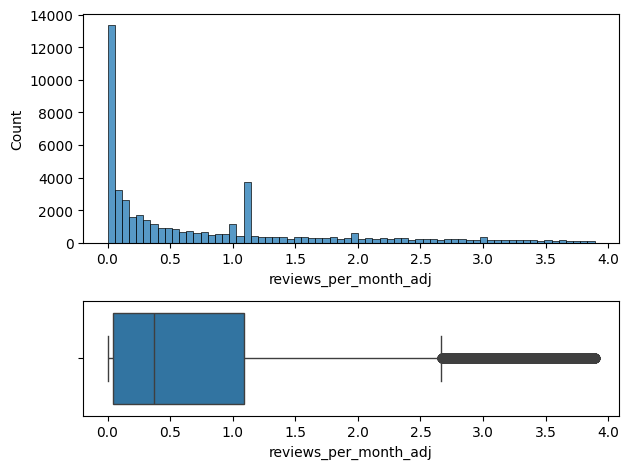

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64 count    48895.000000
mean         0.796977
std          0.962765
min          0.000000
25%          0.040000
50%          0.370000
75%          1.090910
max          3.890000
Name: reviews_per_month_adj, dtype: float64


In [35]:
var_name="reviews_per_month"
var_name_adj="reviews_per_month_adj"
print(len(data.groupby(var_name)[var_name].nunique()))
print(data.groupby(var_name)[var_name].count().sort_values(ascending=False).head(20))

var_stats=data[var_name].describe()
IQR = var_stats["75%"] - var_stats["25%"]
MAX = var_stats["75%"] + 1.5 * IQR
MIN = var_stats["25%"] - 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(MAX, 2)} y {round(MIN, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

data[var_name_adj] = np.where(data[var_name] > MAX,
    data[var_name].mean(),
    data[var_name]
)


fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

sns.boxplot(ax = axis[1], data = data, x = var_name_adj)
sns.histplot(ax = axis[0], data = data, x = var_name_adj)

plt.tight_layout()
plt.show()

print(data[var_name].describe(),data[var_name_adj].describe())

En este caso, con el IQR pasa parecido a las variables anteriores, vamos a probar con un valor superior al mismo (por ejemplo con casi el doble 8)

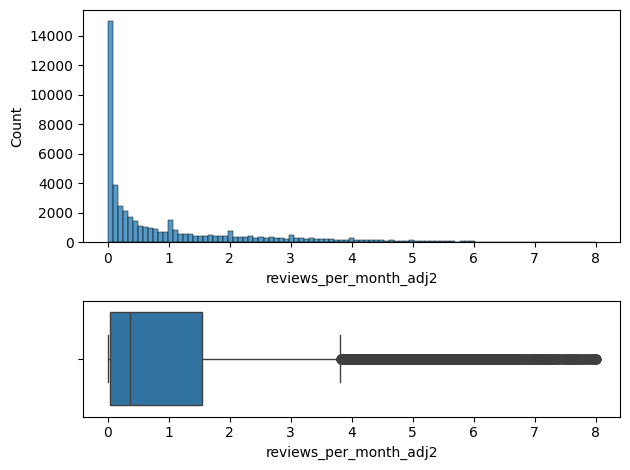

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64 count    48895.000000
mean         1.046774
std          1.437233
min          0.000000
25%          0.040000
50%          0.370000
75%          1.550000
max          8.000000
Name: reviews_per_month_adj2, dtype: float64


In [36]:
data["reviews_per_month_adj2"] = np.where(data[var_name] > 8,
    data[var_name].mean(),
    data[var_name]
)


fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

sns.boxplot(ax = axis[1], data = data, x = "reviews_per_month_adj2")
sns.histplot(ax = axis[0], data = data, x = "reviews_per_month_adj2")

plt.tight_layout()
plt.show()

print(data[var_name].describe(),data["reviews_per_month_adj2"].describe())

Vemos que se mantiene la media, el percentil 75 y los datos siguen una distribución más homogénea (no despunta tanto la media nueva calculada)

VAMOS A ANALIZAR **CALCULATED_HOST_LISTINGS_COUNT**

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


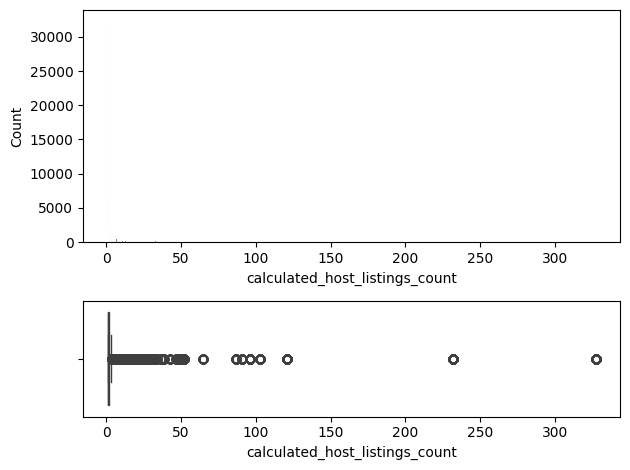

In [37]:
fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

print(data_n["calculated_host_listings_count"].describe())
sns.boxplot(ax = axis[1], data = data_n, x = "calculated_host_listings_count")
sns.histplot(ax = axis[0], data = data_n, x = "calculated_host_listings_count")
plt.tight_layout()
plt.show()

Tiene pinta de que todos los datos se acumulan en pocos valores muy pequeños

47
calculated_host_listings_count
1      32303
2       6658
3       2853
4       1440
5        845
6        570
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
Name: calculated_host_listings_count, dtype: int64
Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0


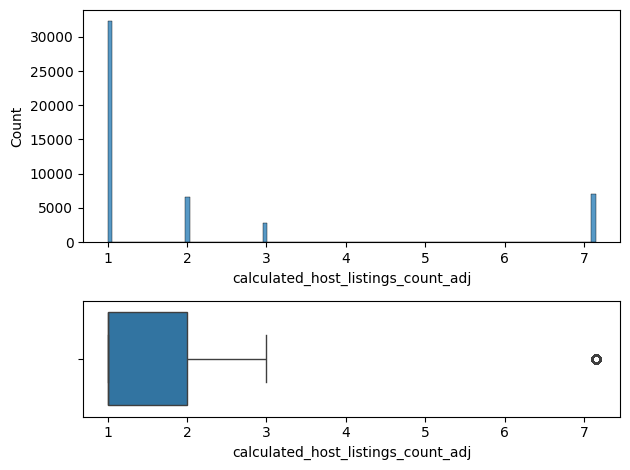

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64 count    48895.000000
mean         2.142643
std          2.128564
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.143982
Name: calculated_host_listings_count_adj, dtype: float64


In [38]:
var_name="calculated_host_listings_count"
var_name_adj="calculated_host_listings_count_adj"
print(len(data.groupby(var_name)[var_name].nunique()))
print(data.groupby(var_name)[var_name].count().sort_values(ascending=False).head(20))

var_stats=data[var_name].describe()
IQR = var_stats["75%"] - var_stats["25%"]
MAX = var_stats["75%"] + 1.5 * IQR
MIN = var_stats["25%"] - 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(MAX, 2)} y {round(MIN, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

data[var_name_adj] = np.where(data[var_name] > MAX,
    data[var_name].mean(),
    data[var_name]
)


fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

sns.boxplot(ax = axis[1], data = data, x = var_name_adj)
sns.histplot(ax = axis[0], data = data, x = var_name_adj)

plt.tight_layout()
plt.show()

print(data[var_name].describe(),data[var_name_adj].describe())


Efectivamente, el 80% de los datos se agrupan entre el 1 y el 2, por tanto, no va a ser una variable que nos aporte demasiado al análisis.

VAMOS A ANALIZAR **AVAILABILITY_365**

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


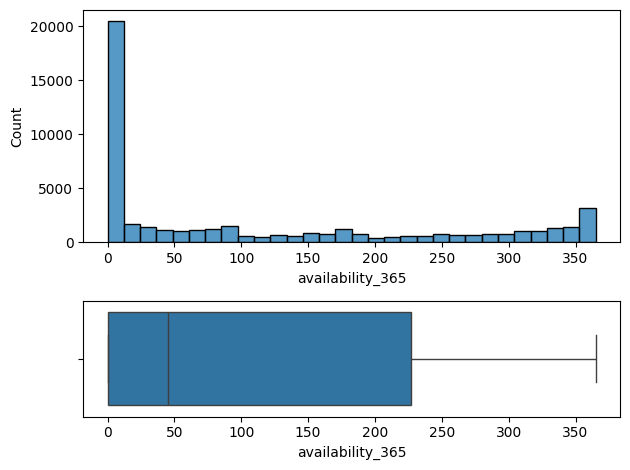

In [39]:
fig, axis = plt.subplots(2,1,gridspec_kw={'height_ratios': [6, 3]})

print(data_n["availability_365"].describe())
sns.boxplot(ax = axis[1], data = data_n, x = "availability_365")
sns.histplot(ax = axis[0], data = data_n, x = "availability_365")
plt.tight_layout()
plt.show()

En este caso tenemos todos los datos dentro del IQR, por tanto, no tiene atípicos. Vemos que la mayor parte de los datos se encuentran en valores pequeños y luego un pequeño repunte a final (365 será probablemente) lo comprobamos

In [40]:
print(data.groupby("availability_365")["availability_365"].count().sort_values(ascending=False).head(20))

availability_365
0      17533
365     1295
364      491
1        408
89       361
5        340
3        306
179      301
90       290
2        270
6        245
363      239
4        233
8        233
342      230
188      225
7        219
88       200
341      199
311      199
Name: availability_365, dtype: int64


Esta variable nos indica el número de días que está disponible el inmueble a lo largo del año, sin embargo, tenemos demasiados valores con 0 (es decir, ningún día reservable) tendríamos que limpiar esos valores o analizar cómo están relacionados con los demás 0s de otras variables y de valores nulos. 

Un punto interesante sería etiquetar los outliers de cada variable y compararlos con el resto de las variables, ya que si coinciden, podrían analizarse aparte, o sacar conclusiones directamente sobre esos datos elevados.

VAMOS A REALIZAR EL ESCALADO DE LAS VARIABLES DE NUESTRA BASE DE DATOS:

En este caso vamos a normalizar todas las variables, sin tener en cuenta ninguna variable objetivo.

**Normalización**

In [41]:

data_n.drop("host_id",axis=1,inplace=True)
scaler = StandardScaler()
scaler.fit(data_n)

num_variables=["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365","neighbourhood_group_n","room_type_n"]

Data_norm = scaler.transform(data_n)
Data_norm = pd.DataFrame(Data_norm, index = data_n.index, columns = num_variables)

Data_norm.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,-0.917828,0.909359
1,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,0.441222,-0.924247
2,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,0.441222,0.909359
3,-0.265335,-0.293996,5.538156,2.221978,-0.186451,0.617065,-0.917828,-0.924247
4,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.856865,0.441222,-0.924247


**Escalado mínimo-máximo**

In [42]:

scaler = MinMaxScaler()
scaler.fit(data_n)

Data_scal = scaler.transform(data_n)
Data_scal = pd.DataFrame(Data_scal, index = data_n.index, columns = num_variables)


Data_scal.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,0.0149,0.000000,0.014308,0.003590,0.015337,1.000000,0.25,0.5
1,0.0225,0.000000,0.071542,0.006496,0.003067,0.972603,0.50,0.0
2,0.0150,0.001601,0.000000,0.000000,0.000000,1.000000,0.50,0.5
3,0.0089,0.000000,0.429253,0.079316,0.000000,0.531507,0.25,0.0
4,0.0080,0.007206,0.014308,0.001709,0.000000,0.000000,0.50,0.0


SELECCIÓN DE CARACTERÍSTICAS:

Solo lo podemos hacer eligiendo una variable objetivo, cojamos el **precio**

In [43]:

num_variables2=["minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365","neighbourhood_group_n","room_type_n"]

#We divide the dataset into training and test samples
X = data_n.drop("price", axis = 1)[num_variables2]
y = data_n["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()


,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
32645,3,11,0.87,1,1,1,0
23615,2,2,0.16,1,0,2,1
31183,2,0,0.00,2,0,1,1
29260,3,87,4.91,1,267,1,0
7275,5,13,0.25,1,0,3,1


In [44]:
# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 3 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n
0,3.0,11.0,1.0,1.0,0.0
1,2.0,2.0,1.0,0.0,1.0
2,2.0,0.0,2.0,0.0,1.0
3,3.0,87.0,1.0,267.0,0.0
4,5.0,13.0,1.0,0.0,1.0


In [45]:
#PARA LOS ESTADISTICOS

# Crear y ajustar el modelo de selección de características
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train, y_train)

## Obtener índices de características seleccionadas
selected_indices = selection_model.get_support()

# Obtener puntuaciones F y p-values
f_scores = selection_model.scores_
p_values = selection_model.pvalues_

# Crear un DataFrame con información sobre las características seleccionadas
feature_stats = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': selected_indices,
    'F-Score': f_scores,
    'P-Value': p_values
})

# Imprimir el DataFrame con estadísticas
print(feature_stats)

                          Feature  Selected    F-Score        P-Value
0                  minimum_nights      True   2.056115   2.725867e-48
1               number_of_reviews      True   1.915987   9.210224e-39
2               reviews_per_month     False   1.815283   2.433344e-32
3  calculated_host_listings_count      True  29.249079   0.000000e+00
4                availability_365      True   3.636316  3.258644e-184
5           neighbourhood_group_n     False   1.274265   3.101119e-06
6                     room_type_n      True  55.599529   0.000000e+00


In [46]:
X_train_sel.columns

Index(['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'room_type_n'],
      dtype='object')

Las variables que nos indican más significativas son 
+ minimum_nights
+ number_of_reviews
+ calculated_host_listings_count
+ availability_365
+ room_type_n

**Guardamos los conjuntos ya seleccionados:**

In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

X_train_sel.to_csv("/workspaces/Isa-machine-learning-template/data/raw/AB_NYC_2019_clean_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Isa-machine-learning-template/data/raw/AB_NYC_2019_clean_test.csv", index=False)